In [20]:
import numpy as np
import pandas as pd
import create_data_set as make_df
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import KMeans
from dateutil.relativedelta import relativedelta
from sklearn.metrics import  adjusted_rand_score
import datetime
from functions import functions as utils2
import plotly.express as px

## 1 - Analyse temporelles des commandes

In [21]:
orders_df=pd.read_csv('data/olist_orders_dataset.csv')
orders_df['order_purchase_timestamp'] = orders_df['order_purchase_timestamp'].astype('datetime64[ns]')

In [22]:
order_max_date = orders_df['order_purchase_timestamp'].max() 
order_min_date = orders_df['order_purchase_timestamp'].min() 



In [23]:
order_min_date

Timestamp('2016-09-04 21:15:19')

In [24]:
order_max_date

Timestamp('2018-10-17 17:30:18')

In [25]:
diff=order_max_date-order_min_date

In [26]:
number_of_month = int(diff/np.timedelta64(1,'M'))
number_of_month

25

Les commandes sont faites entre le 4 septembre 2016 au 17 octobre 2018. Soit en l'espace de 772 jours, soit 25 à 26 mois

## 2 - Clustering année entière de 2016 à 2017

Anfin d'estimer et de maintenir le clustering des clients, nous allons nous  concentrer uniquement sur les clients de l'année 2017, étant donné qu'on a des données sur l'année complète, et puis à la fin observer l'indice ajusté de rand

In [27]:
from_date=datetime.datetime(2016, 1, 1)
to_date=datetime.datetime(2017, 12, 31)
## can take too long to compute
df_2017=make_df.create_df(from_date,to_date)
#df_2017=pd.read_csv('data/customers_cleaned_2017.csv')

/home/amadou/Desktop/ml/segmentation_client_site_ecommerce_DIOP_Amadou/create_data_set.py:351: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/amadou/Desktop/ml/segmentation_client_site_ecommerce_DIOP_Amadou/create_data_set.py:402: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/amadou/Desktop/ml/segmentation_client_site_ecommerce_DIOP_Amadou/create_data_set.py:403: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [28]:
df_2017.head()

,customer_unique_id,nb_orders,mean_nb_products,total_price_spent,total_freight_value_spent,total_spent,mean_delay_delivery_time,mean_review_score,mean_count_payment_sequential,mean_total_payment_installments,...,x0_automobile,x0_electronics,x0_fashion_and_cloth_shoes,x0_foods_and_drinks,x0_health_beauty,x0_house_ware_and_accessories,x0_others,x0_sports_and_accessories,x0_toys_and_game_gift,pca_0
0,0000f46a3911fa3c0805444483337064,-0.287746,-0.268816,-0.330119,-0.275798,-0.341166,1.323653,-0.852280,-0.116481,1.686016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,156.433756
1,0000f6ccb0745a6a4b88665a16c9f078,-0.287746,-0.268816,-0.520807,-0.256358,-0.522214,0.727500,-0.085526,-0.116481,0.293194,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-59.653837
2,0004aac84e0df4da2b147fca70cf8255,-0.287746,-0.268816,0.162010,-0.291446,0.129177,0.005591,0.681228,-0.116481,0.989605,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-92.637477
3,0005e1862207bf6ccc02e4228effd9a0,-0.287746,-0.268816,-0.037502,-0.375371,-0.069594,-0.912033,-0.085526,-0.116481,-0.055012,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,162.330355
4,0006fdc98a402fceb4eb0ee528f6a8d4,-0.287746,-0.268816,-0.574409,-0.376320,-0.584348,0.345560,-0.852280,-0.116481,-0.403217,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.859659


In [29]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42706 entries, 0 to 50641
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_unique_id               42706 non-null  object 
 1   nb_orders                        42706 non-null  float64
 2   mean_nb_products                 42706 non-null  float64
 3   total_price_spent                42706 non-null  float64
 4   total_freight_value_spent        42706 non-null  float64
 5   total_spent                      42706 non-null  float64
 6   mean_delay_delivery_time         42706 non-null  float64
 7   mean_review_score                42706 non-null  float64
 8   mean_count_payment_sequential    42706 non-null  float64
 9   mean_total_payment_installments  42706 non-null  float64
 10  favorite_month                   42706 non-null  float64
 11  main_favorite_category           42706 non-null  object 
 12  last_review_score 

In [30]:
df_2017['customer_unique_id'].nunique()

42706

Pour estimer le moment où les clients changent de cluster, on se consacre uniquement aux comportements des clients de de 2017 sur toute l'année 2017.Et par la suite calculer le l'indice ajusté de rand, afin d'en observer le comportement sur l'année 2018

In [31]:
customer_unique_ids = df_2017['customer_unique_id'].unique().tolist()

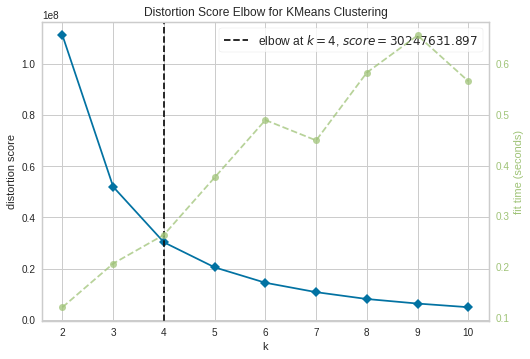

In [32]:
 
pca_cols=[col for col in df_2017.columns.tolist() if col.startswith('pca')]
X_val=df_2017[pca_cols].values
if len(X_val)==1:
    X_val=np.array(df_2017[pca_cols[0]]).reshape((len(df_2017[pca_cols[0]]), 1))
                                                              
kmeans_visualizer = KElbowVisualizer(KMeans(),K=(2,6))
kmeans_visualizer.fit(X_val)
kmeans_visualizer.show()

Selon la méthode du coude, K=4 comme nombre de cluster semble être le nombre optimal de clusters

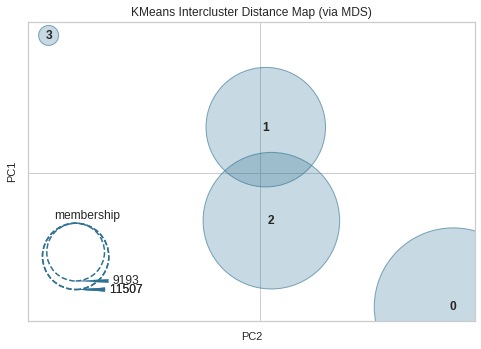

In [33]:
K=kmeans_visualizer.elbow_value_

kmeans = KMeans(K)
kmeans.fit(X_val)
InterclusterDistance(KMeans(kmeans_visualizer.elbow_value_)).fit(X_val).show()

In [34]:
label_2017=kmeans.labels_
df_2017['kmeans_label_1']=kmeans.labels_
kmeans_clusters = df_2017.groupby("kmeans_label_1").mean().reset_index()
#cols=[col for col in kmeans_clusters.columns.tolist() if not col.startswith('x0')]
utils2.plot_radars(kmeans_clusters,"kmeans_label_1",[0,1,2,3,4])


## 2 - Etude de la stabilité temporelle de la segmentation avec itération de 2 mois

In [35]:

dates_dict = {}

number_of_month_from_end = int((order_max_date -to_date)/np.timedelta64(1,'M'))
period = 2
score=[]
for p in np.arange(0,number_of_month_from_end,period):
    from_ = to_date-relativedelta(months=p)
    to_ = from_ +relativedelta(months=period)
    df_ = make_df.create_df(from_,to_,True,customer_unique_ids)
    if df_.shape[0] >=K:
        kmeans_ =KMeans(K)
        pca_cols=[col for col in df_.columns.tolist() if col.startswith('pca')]
        X_val=df_[pca_cols].values
        if len(X_val)==1:
            X_val=np.array(df_[pca_cols[0]]).reshape((len(df_[pca_cols[0]]), 1))
        kmeans_.fit(X_val)
        p_labels = kmeans_.labels_
        df_included = df_2017.loc[df_2017['customer_unique_id'].isin(df_['customer_unique_id'])]

        # Calculate ARI score
        ari_ = adjusted_rand_score(df_included['kmeans_label_1'], kmeans_.labels_)
        score.append([p+1,ari_])
    
    
    
    


/home/amadou/Desktop/ml/segmentation_client_site_ecommerce_DIOP_Amadou/create_data_set.py:351: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/amadou/Desktop/ml/segmentation_client_site_ecommerce_DIOP_Amadou/create_data_set.py:402: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/amadou/Desktop/ml/segmentation_client_site_ecommerce_DIOP_Amadou/create_data_set.py:403: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [36]:
score

[[1, -0.004104201816951351],
 [3, 0.0],
 [5, 0.3318639435564632],
 [7, 0.29931585531754434],
 [9, -0.00037230401011978907]]

In [37]:
result = pd.DataFrame(score, columns=["Month", "Rand"])

In [38]:

px.line(result, x="Month", y="Rand", title='Evolution de l\'indice de Rand').show()

Au bout de 5 à 7 mois, voire en moyenne 6 mois, il peut etre songé à relancer la segmentation